## Load Libraries

In [1]:
import pandas as pd
import numpy as np
from EPA_TRI import TRI_Query
import geopandas as gpd
import geoplot as gplt

## Get Data

In [2]:
df = TRI_Query(year=['=',2019])

## Filter and Transform

In [3]:
#sum incineration quantity by location
grouped_df = df.loc[df['TRI_TRANSFER_QTY.TYPE_OF_WASTE_MANAGEMENT'].str.contains('Incineration'),:].groupby(
    ['TRI_FACILITY.FAC_LONGITUDE','TRI_FACILITY.FAC_LATITUDE'])

subdf = grouped_df['TRI_TRANSFER_QTY.TOTAL_TRANSFER'].agg(sum).reset_index()
#filter data, more than 20 metric tons
subdf = subdf.loc[(subdf['TRI_TRANSFER_QTY.TOTAL_TRANSFER']>44090),:]

#convert to Geo DataFrame
gdf = gpd.GeoDataFrame(subdf,
                       geometry=gpd.points_from_xy(subdf['TRI_FACILITY.FAC_LONGITUDE'].values/-10000,
                                                         subdf['TRI_FACILITY.FAC_LATITUDE'].values/10000))
#add a column for the log of quantity
gdf['Log_Quantity'] = np.log10(gdf['TRI_TRANSFER_QTY.TOTAL_TRANSFER'])

## Plot Data

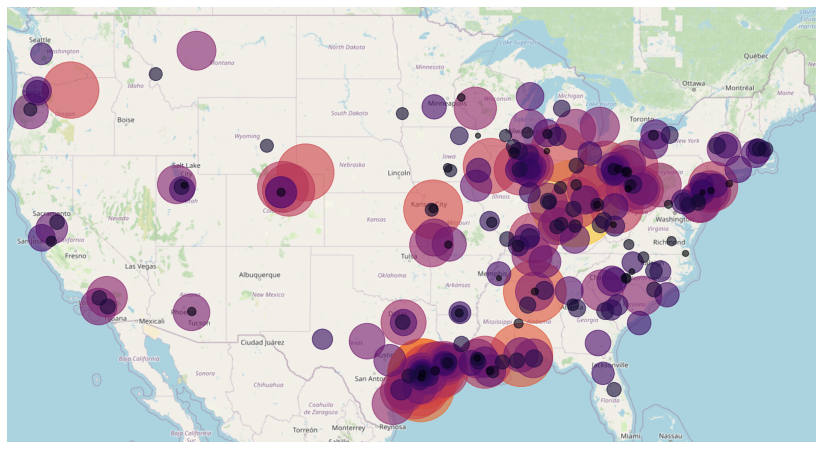

In [4]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
ax = gplt.webmap(contiguous_usa, projection=gplt.crs.WebMercator(),figsize=(15,8))
gplt.pointplot(gdf, ax=ax,hue='Log_Quantity',scale='Log_Quantity',limits=(5,100),legend=False,
               extent=contiguous_usa.total_bounds,cmap='inferno',alpha=0.6);
